In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
def is_numeric(num):
    num = str(num)
    
    if num.isnumeric():
        return True
    else:
        temp = num.split('.')
        if (len(temp) == 2 and (temp[0].isnumeric() or (temp[0][0] == '-' and temp[0][1:].isnumeric())) and temp[1].isnumeric()):
            return True
        elif num[0] == '-' and num[1:].isnumeric():
            return True
    return False

def cost():
    # Find the value of expected output
    for i, row in Data_set.iterrows:
        print(row)


TypeError: 'method' object is not iterable

In [180]:
Data_set = pd.read_csv("includes/house_prices.csv", encoding = "ISO-8859-1")

# Readjusting fields and data
# Columns URL, id, Cid, totalProce, DOM, tradeTime are unnecessary dropping these 5
Data_set.drop(['url', 'id', 'Cid', 'totalPrice', 'DOM', 'tradeTime'], axis=1, inplace=True)

# constructionTime is to be replaced by age in years from 2022
for col in Data_set.columns:
    Data_set = Data_set[Data_set[col].apply(lambda x: is_numeric(x))]

for col in Data_set.columns:
    Data_set[col] = [float(x) for x in Data_set[col]]

Data_set['propertyAge'] = [2022 - int(x) for x in Data_set['constructionTime']]
Data_set.drop(['constructionTime'], axis=1, inplace=True)

# Removing OutLiers
for col in Data_set.columns:
    if col in ['kitchen', 'bathRoom', 'elevator', 'subway', 'price']: # Bool variables are kept as is
        continue
    mean = Data_set[col].mean();
    std = Data_set[col].std();
    Data_set = Data_set[Data_set[col].apply(lambda x: mean - 2 * std <= x <= mean + 2 * std)]
    
    # Normalize the data
    Data_set[col] = [(x - mean) / std for x in Data_set[col]]
    
# Model will work based the remaining fields
Data_set.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7068\3809797369.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_set = pd.read_csv("includes/house_prices.csv", encoding = "ISO-8859-1")


,Lng,Lat,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,propertyAge
count,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000,187696.000000
mean,-0.063598,0.025815,-0.144577,42472.883434,-0.050943,0.049747,0.181808,1.000096,1.156349,0.009211,-0.040821,0.009312,0.051337,-0.003013,0.575686,-0.016506,0.595186,0.032181,-0.162256,-0.091059
std,0.832266,0.902891,0.499324,18700.774046,0.746370,0.950043,0.853188,0.054329,0.366443,0.960282,1.016892,1.005324,0.994903,0.000006,0.494240,1.006241,0.490857,0.822898,0.779516,0.882139
min,-1.998892,-1.998785,-0.499055,1.000000,-1.993404,-1.336020,-0.273964,0.000000,0.000000,-1.432175,-1.594469,-1.201750,-1.224243,-0.003025,0.000000,-1.459935,0.000000,-1.727300,-1.936071,-1.917109
25%,-0.665748,-0.635934,-0.499055,29121.750000,-0.637881,0.085610,-0.273964,1.000000,1.000000,-0.919423,-1.594469,-1.201750,-1.224243,-0.003017,0.000000,-1.459935,0.000000,-0.196230,-0.775564,-0.743550
50%,-0.032104,-0.149671,-0.356405,38561.500000,-0.193891,0.085610,-0.273964,1.000000,1.000000,-0.150296,0.766373,0.326903,0.860854,-0.003014,1.000000,0.684959,1.000000,0.186537,-0.290854,-0.274127
75%,0.498124,0.653407,-0.014043,51780.000000,0.416081,0.085610,-0.273964,1.000000,1.000000,0.875208,0.766373,1.091229,0.860854,-0.003009,1.000000,0.684959,1.000000,0.569305,0.320296,0.547364
max,1.995307,1.992006,1.983066,149660.000000,1.999488,1.507241,1.778937,3.000000,7.000000,1.900711,0.766373,1.091229,0.860854,-0.002860,1.000000,0.684959,1.000000,1.717607,1.992036,1.955634


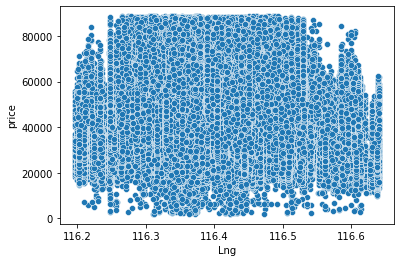

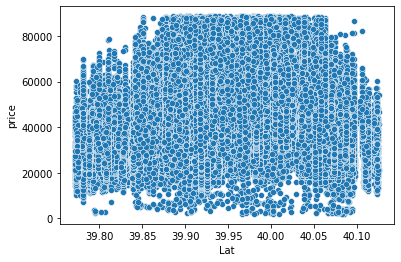

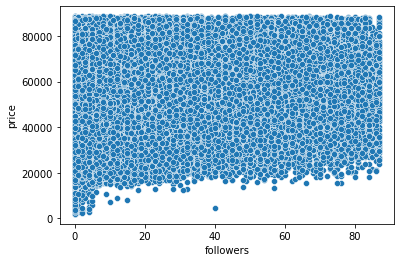

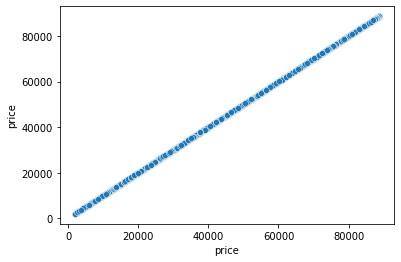

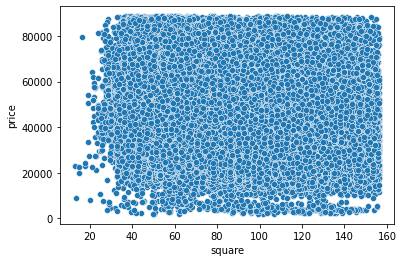

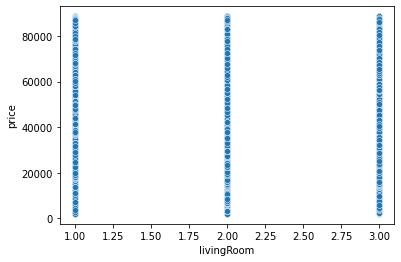

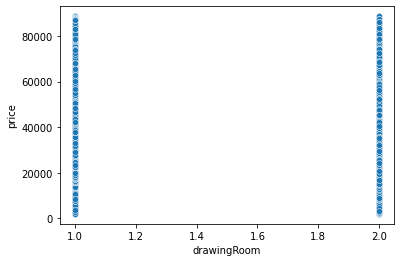

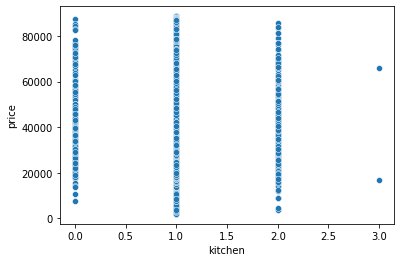

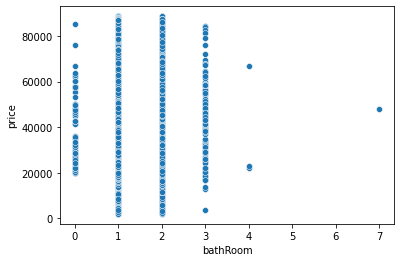

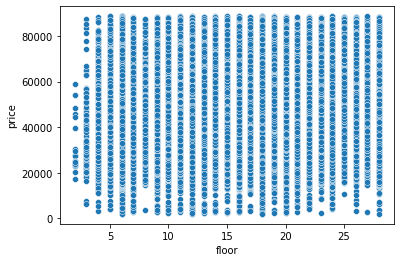

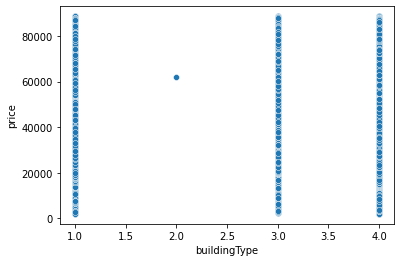

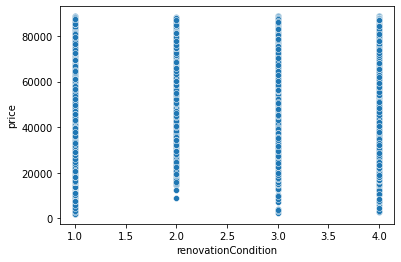

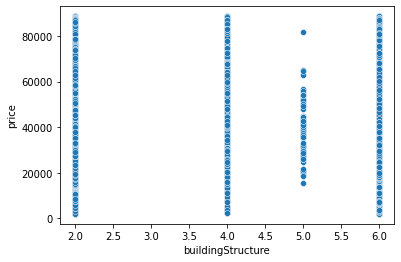

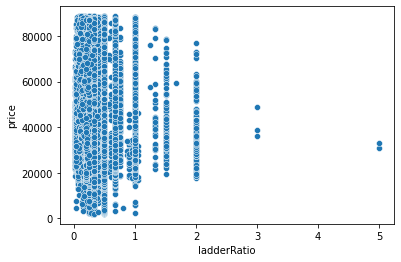

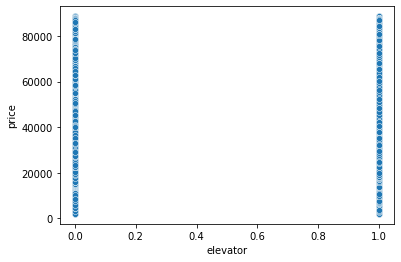

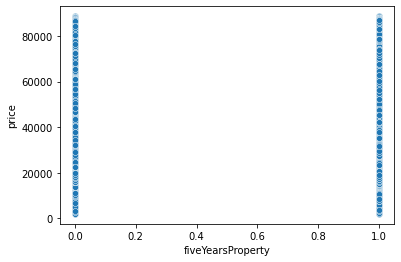

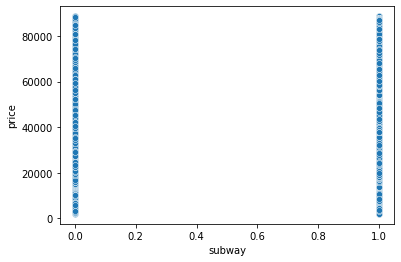

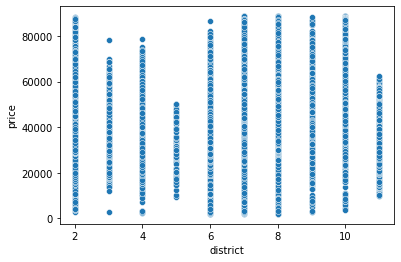

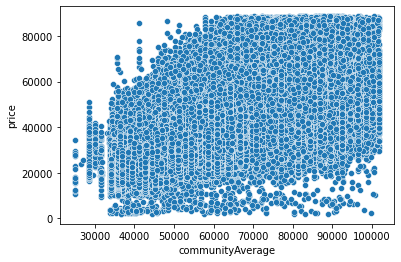

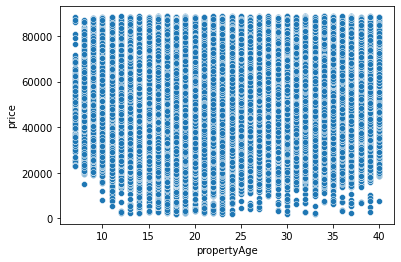

In [165]:
# Display data relations
for z in list(Data_set.columns):
    plt.figure()
    sns.scatterplot(x=Data_set[z], y=Data_set['price'])    

In [182]:
# Using Learning Rate as abs(Correlation ^ -1 / 500)
learning_rates = np.array([[abs(1 /(500 * x)) for x in Data_set.corr()['price']]])
# Using random values as start point for w and b
params = np.random.rand(1,19)
b = 0

# To store cost after every iteration and draw plot
progress = []

print(learning_rates)
print(params)

[[0.01367706 0.05659572 0.00538936 0.002      0.01079461 0.02579731
  0.01680472 0.51488572 0.0245803  0.03045159 0.02877784 0.00595944
  0.02887701 0.02498769 0.02521717 0.16515131 0.01023327 0.00736452
  0.0032495  0.01201847]]
[[0.3424659  0.00610034 0.4741891  0.25599191 0.06481916 0.50397443
  0.46586959 0.5316975  0.61598428 0.97752375 0.93896589 0.14690219
  0.70035671 0.34917922 0.73682163 0.63700143 0.10540577 0.94788348
  0.33859185]]


In [184]:
# Remove price from the dataset
prices = Data_set['price']
Data_set.drop(['price'], axis=1, inplace=True)